In [1]:
import numpy as np
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='Counts'>)

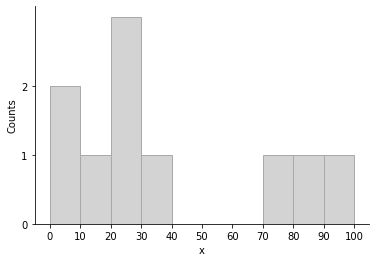

In [2]:
def pretty_hist(x, bins, binlabels=None, countslabels=None, color = "lightgray", edgecolor = "darkgray", plotlog=False):
    if binlabels is None:
        binlabels = bins

    fig, ax = plt.subplots(1,1)
    h = ax.hist(x, bins=bins, color=color, edgecolor=edgecolor, log=plotlog)

    if countslabels is None:
        countslabels = range(int(np.max(h[0])))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks(countslabels)
    ax.set_xticks(binlabels)
    ax.set_xlabel("x")
    ax.set_ylabel("Counts")
    fig.patch.set_facecolor('white')

    plt.plot()
    return (fig, ax)

x = [5, 7, 10, 22, 35, 88, 26, 74, 22, 95]
pretty_hist(x, range(0, 110, 10))


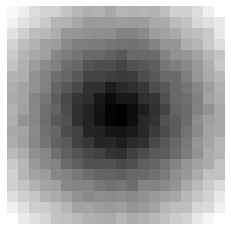

(20, 20)
13
177


In [3]:
np.random.seed(12345)

x_axis = np.linspace(-1, 1, 20)[:, None]
y_axis = np.linspace(-1, 1, 20)[None, :]

img = np.sqrt(x_axis ** 2 + y_axis ** 2)
img = img / (1.5*np.max(img)) * 255
img = img.astype(int) + np.random.choice(range(10), size = (20, 20))


plt.imshow(img, cmap="gray")
plt.axis("off")

plt.show()

print(img.shape)
print(np.min(img))
print(np.max(img))

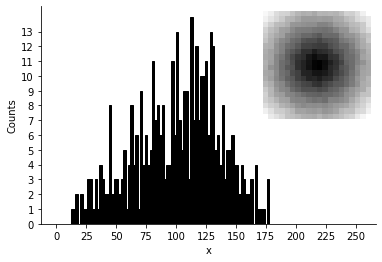

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = pretty_hist(img.ravel(), range(0,255,2), range(0, 255, 25), edgecolor="black", color="black")

axins = inset_axes(ax, width=1.5, height=1.5)
axins.axis("off")
axins.imshow(img, cmap="gray")

plt.show()

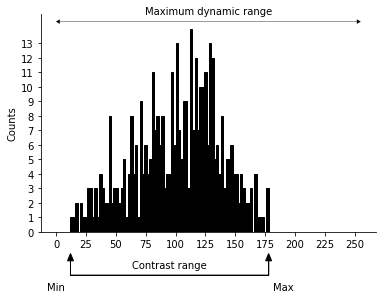

In [5]:
fig, ax = pretty_hist(img.ravel(), range(0,255,2), range(0, 255, 25), edgecolor="black", color="black")

ax.arrow(12, -3, 0, 1, head_width=5, head_length=.5, clip_on=False, color="black")
ax.arrow(178, -3, 0, 1, head_width=5, head_length=.5, clip_on=False, color="black")
ax.text(0, -4, "Min", ha="center")
ax.text(190, -4, "Max", ha="center")
ax.arrow(12, -3, 166, 0, color="black", clip_on=False)
ax.text(95, -2.5, "Contrast range", ha="center")
ax.arrow(0, 14.5, 255, 0, color="black", head_width=0.3, head_length=3, clip_on=False, length_includes_head=True, lw=0.1)
ax.arrow(255, 14.5, -255, 0, color="black", head_width=0.3, head_length=3, clip_on=False, length_includes_head = True, lw=0.1)
ax.text(127.5, 15, "Maximum dynamic range", ha="center")
ax.set_ylim(0, 15)
ax.set_xlabel("")
plt.show()

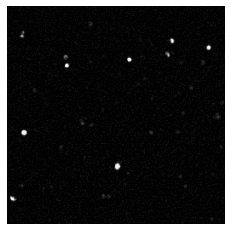

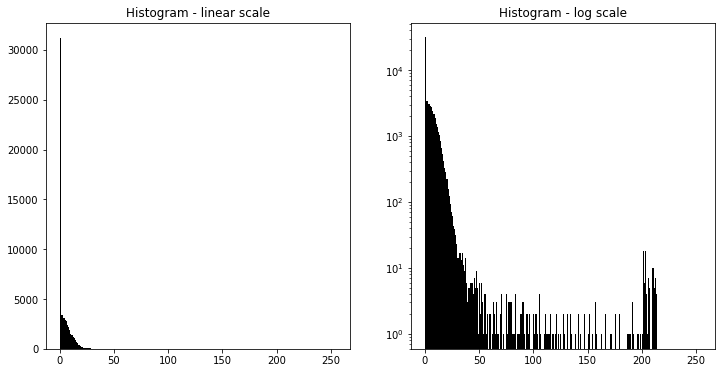

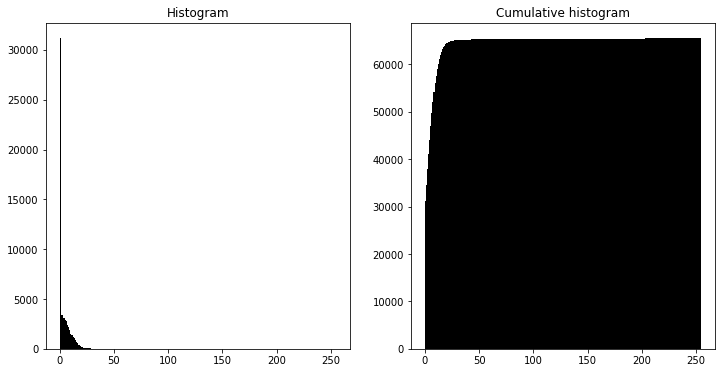

In [25]:
from skimage import io

corticotrophs = io.imread("pit_cells.tif")
plt.imshow(corticotrophs, cmap="gray")
plt.axis("off")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(corticotrophs.ravel(), bins=range(256), color="black")
ax[1].hist(corticotrophs.ravel(), bins=range(256), color="black", log=True)
ax[0].set_title("Histogram - linear scale")
ax[1].set_title("Histogram - log scale")
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].hist(corticotrophs.ravel(), bins=range(256), color="black")
ax[1].hist(corticotrophs.ravel(), bins=range(256), color="black", 
cumulative=True)
ax[0].set_title("Histogram")
ax[1].set_title("Cumulative histogram")
plt.show()

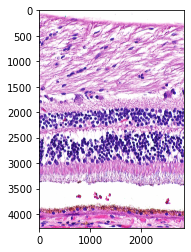

(4272, 2848, 3)
uint8


In [7]:
from skimage import io
retina = io.imread("RetinaHnE.jpg")
plt.imshow(retina)
plt.show()
print(retina.shape)
print(retina.dtype)

[]

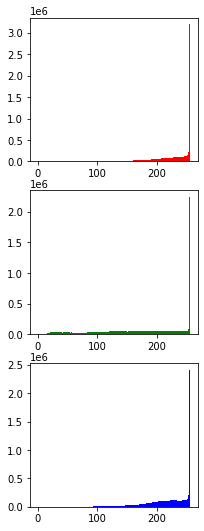

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(3,9))

ax[0].hist(retina[:, :, 0].ravel(), range(256), color="red")
ax[1].hist(retina[:, :, 1].ravel(), range(256), color="green")
ax[2].hist(retina[:, :, 2].ravel(), range(256), color="blue")

plt.plot()

[]

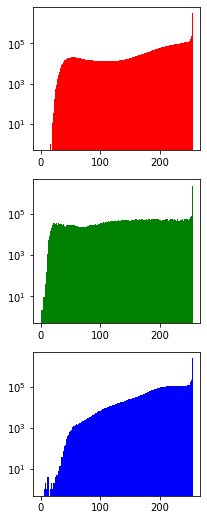

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(3,9))

ax[0].hist(retina[:, :, 0].ravel(), range(256), color="red", log=True)
ax[1].hist(retina[:, :, 1].ravel(), range(256), color="green", log=True)
ax[2].hist(retina[:, :, 2].ravel(), range(256), color="blue", log=True)

plt.plot()

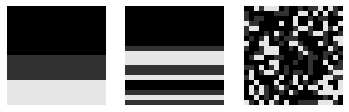

In [10]:
rng = np.random.default_rng()

img1 = np.zeros((20, 20), dtype=np.uint8)
img1[10:15] = 50
img1[15:] = 230

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img1, cmap="gray", vmax=255)
rng.shuffle(img1, axis=0)
img1.reshape(20, 20)
ax[1].imshow(img1, cmap="gray", vmax=255)
rng.shuffle(img1.ravel())
img1.reshape(20, 20)
ax[2].imshow(img1, cmap="gray", vmax=255)

for a in ax:
    a.axis("off")
plt.show()



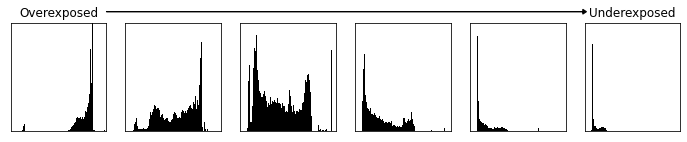

In [11]:
xray = io.imread("xray_brightness_Veldkamp_2009.png")
xray = xray[10:200]

fig, ax = plt.subplots(1, 6, figsize = (12, 2))
ax[0].hist(xray[:,10:170].ravel(), range(256), color="black")
ax[1].hist(xray[:,180:340].ravel(), range(256), color="black")
ax[2].hist(xray[:,350:510].ravel(), range(256), color="black")
ax[3].hist(xray[:,530:690].ravel(), range(256), color="black")
ax[4].hist(xray[:,700:860].ravel(), range(256), color="black")
ax[5].hist(xray[:,875:-10].ravel(), range(256), color="black")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

ax[0].set_title("Overexposed")
ax[5].set_title("Underexposed")

ax[0].arrow(255, 2200, 1280, 0, color="black", head_width=90, head_length=10, clip_on=False, length_includes_head=True, lw=1)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 2000)

plt.show()

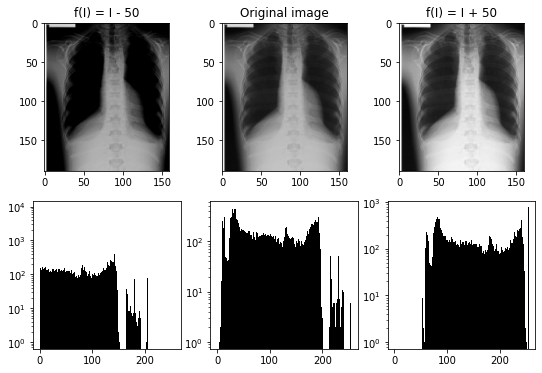

In [12]:
def change_lum(x, offset):
    res = x + offset
    if res < 0:
        res = 0
    if res > 255:
        res = 255
    return (res)

v_change_lum = np.vectorize(change_lum)



xray2 = xray[:, 350:510]
xray2_over = v_change_lum(xray2, 50)
xray2_under = v_change_lum(xray2, -50)

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

ax[0,0].imshow(xray2_under, cmap="gray")
ax[0,1].imshow(xray2, cmap="gray")
ax[0,2].imshow(xray2_over, cmap="gray")

ax[0,0].set_title("f(I) = I - 50")
ax[0,1].set_title("Original image")
ax[0,2].set_title("f(I) = I + 50")

ax[1,0].hist(xray2_under.ravel(), bins = range(256), color="black", log=True)
ax[1,1].hist(xray2.ravel(), bins = range(256), color="black", log=True)
ax[1,2].hist(xray2_over.ravel(), bins = range(256), color="black", log=True)
plt.show()

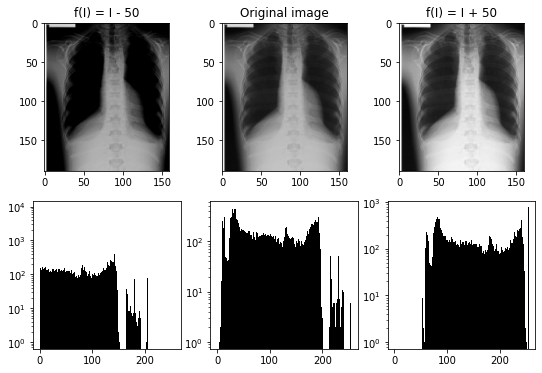

In [13]:
from skimage import img_as_float, img_as_ubyte

def change_brightness(img, offset):
    """
    Changes the brightness of an image
    img: the image
    offset: the brightness offset to apply
    """

    img2 = img_as_float(img)
    img2 += offset/255
    img2[img2<0]=0
    img2[img2>1]=1

    return (img_as_ubyte(img2))

xray2 = xray[:, 350:510]
xray2_over = change_brightness(xray2, 50)
xray2_under = change_brightness(xray2, -50)

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

ax[0,0].imshow(xray2_under, cmap="gray")
ax[0,1].imshow(xray2, cmap="gray")
ax[0,2].imshow(xray2_over, cmap="gray")

ax[0,0].set_title("f(I) = I - 50")
ax[0,1].set_title("Original image")
ax[0,2].set_title("f(I) = I + 50")

ax[1,0].hist(xray2_under.ravel(), bins = range(256), color="black", log=True)
ax[1,1].hist(xray2.ravel(), bins = range(256), color="black", log=True)
ax[1,2].hist(xray2_over.ravel(), bins = range(256), color="black", log=True)
plt.show()

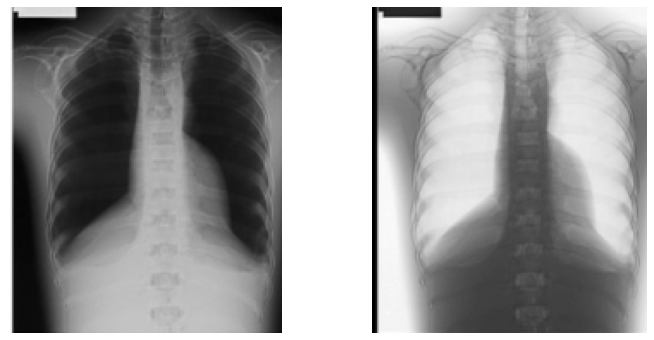

In [21]:
def invert_image(img):
    """
    Inverst an image
    img: the image
    """
    return (255 - img)

xray2 = xray[:, 350:510]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(xray2, cmap="gray")
ax[1].imshow(invert_image(xray2), cmap="gray")
for a in ax:
    a.axis("off")
plt.show()

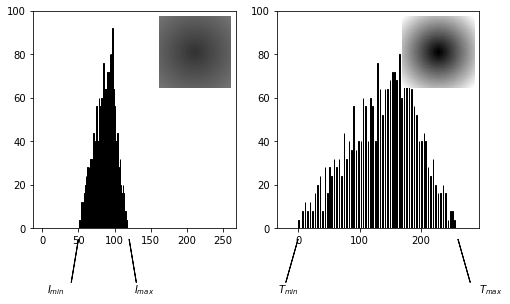

In [99]:
from skimage.exposure import rescale_intensity

np.random.seed(12345)

x_axis = np.linspace(-0.5, 0.5, 50)[:, None]
y_axis = np.linspace(-0.5, 0.5, 50)[None, :]

img = np.sqrt(x_axis ** 2 + y_axis ** 2)
img = img / (1.5*np.max(img)) * 100 + 50
img = img.astype(int)

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

img_2 = rescale_intensity(img, out_range=(0, 255))

ax[0].hist(img.ravel(), range(256), color="black", edgecolor="black")
ax[1].hist(img_2.ravel(), range(256), color="black", edgecolor="black")

fig.text(.15, -0.1, "$I_{min}$")
fig.text(.3, -0.1, "$I_{max}$")
fig.text(.55, -0.1, "$T_{min}$")
fig.text(.9, -0.1, "$T_{max}$")
ax[0].arrow(40, -25, 10, 20, head_length=0, length_includes_head = True, clip_on=False, color = "black")
ax[0].arrow(130, -25, -10, 20, head_length=0, length_includes_head = True, clip_on=False, color = "black")
ax[0].set_ylim((0, 100))
ax[1].arrow(-20, -25, 20, 20, head_length=0, 
length_includes_head = True, clip_on=False, color = "black")
ax[1].arrow(280, -25, -20, 20, head_length=0, length_includes_head = True, clip_on=False, color = "black")
ax[1].set_ylim((0, 100))

axins = inset_axes(ax[0], width=1, height=1)
axins.axis("off")
axins.imshow(img, cmap="gray", vmin=0, vmax=255)
axins2 = inset_axes(ax[1], width=1, height=1)
axins2.axis("off")
axins2.imshow(img_2, cmap="gray", vmin=0, vmax=255)

plt.show()